In [20]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)

Problem: predict sepal length given the other variables.

# Data Pre-Processing

In [14]:
df = sns.load_dataset('iris')
df = pd.get_dummies(df, drop_first=True)
# Default value is setosa

# Creating X and y matrices for regression:
X = df.drop(columns='sepal_length').to_numpy()
y = df.sepal_length.to_numpy().reshape(-1,1)

df

,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,1
146,6.3,2.5,5.0,1.9,0,1
147,6.5,3.0,5.2,2.0,0,1
148,6.2,3.4,5.4,2.3,0,1


# Calculating OLS:

$$
X\beta=y+\epsilon
$$

Ignoring the errors, the function looks like this:

$$
X\beta=y
$$

Multiplying both sides by $X'$ to make the data square, this also creates a covariance matrix:
$$
X'X\beta=X'y
$$

Multiplying both sides by $(X'X)^{-1}$ to cancel $X$ out by creating an identity matrix, then simplifying:
$$
(X'X)^{-1}X'X\beta=(X'X)^{-1}X'y \rightarrow I\beta=(X'X)^{-1}X'y \rightarrow \beta=(X'X)^{-1}X'y
$$

Ok, all set.

In [21]:
b = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), y)
b

In [31]:
y_hat = np.matmul(X, b)
residuals = y - y_hat

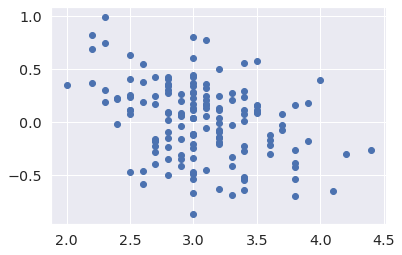

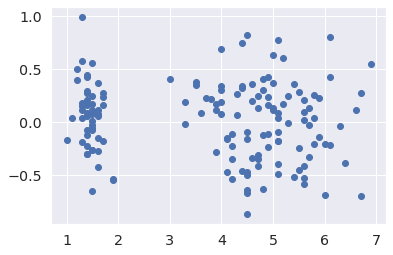

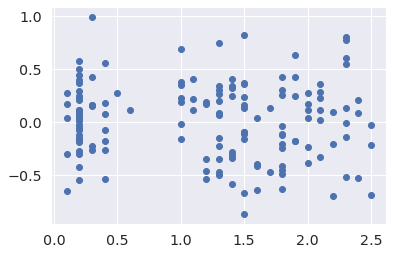

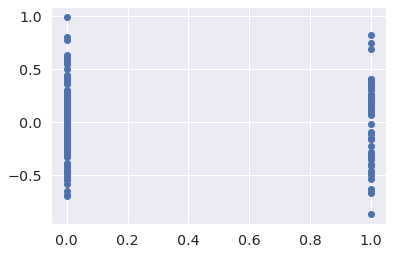

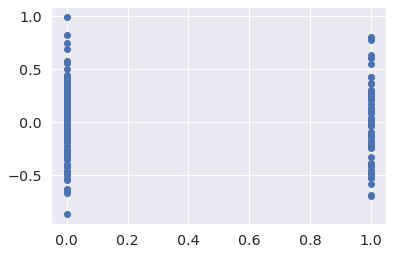

In [32]:
for i in range(X.shape[1]):
    plt.plot(X[:,i], residuals, marker='o', linestyle='none')
    plt.show();

# Comparing to StatsModels

In [23]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              7851.
Date:                Sat, 06 Aug 2022   Prob (F-statistic):                   1.60e-174
Time:                        10:20:43   Log-Likelihood:                         -58.762
No. Observations:                 150   AIC:                                      127.5
Df Residuals:                     145   BIC:                                      142.6
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1222      0.035     31.640      0.000       1.052       1.192
x2             0.8842      0.081     10.931      0.000       0.724       1.044
x3            -0.7560      0.166     -4.546      0.000      -1.085      -0.427
x4             0.0632      0.258      0.245      0.807      -0.448       0.574
x5            -0.1269      0.372     -0.342      0.733      -0.861       0.607
==============================================================================
Omnibus:                        0.236   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.889   Jarque-Bera (JB):                0.403
Skew:                          -0.019   Prob(JB):                        0.818
Kurtosis:                       2.749   Cond. No.                         80.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""